# Imports

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.filterwarnings("ignore")

# Dates

In [2]:
# Define path to files
PATH = "./Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

# Get Stock File Names in a List

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]

tickers.sort()
print(tickers)

['A', 'AA', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAWW', 'ABBV', 'ABC', 'ABCB', 'ABEO', 'ABG', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABT', 'ABTX', 'AC', 'ACAD', 'ACBI', 'ACC', 'ACCO', 'ACER', 'ACGL', 'ACHC', 'ACHV', 'ACIW', 'ACLS', 'ACM', 'ACMR', 'ACN', 'ACNB', 'ACOR', 'ACRE', 'ACRS', 'ACRX', 'ACTG', 'ACU', 'ACY', 'ADBE', 'ADC', 'ADES', 'ADI', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNT', 'ADP', 'ADS', 'ADSK', 'ADTN', 'ADUS', 'ADVM', 'ADXS', 'AE', 'AEE', 'AEHR', 'AEIS', 'AEL', 'AEMD', 'AEO', 'AEP', 'AERI', 'AES', 'AEY', 'AFG', 'AFI', 'AFL', 'AGCO', 'AGEN', 'AGFS', 'AGIO', 'AGLE', 'AGM', 'AGNC', 'AGO', 'AGR', 'AGRX', 'AGTC', 'AGX', 'AGYS', 'AHH', 'AHT', 'AIG', 'AIMC', 'AIN', 'AINC', 'AIR', 'AIRG', 'AIRI', 'AIRT', 'AIT', 'AIV', 'AIZ', 'AJG', 'AJRD', 'AJX', 'AKAM', 'AKBA', 'AKR', 'AKTS', 'AL', 'ALB', 'ALBO', 'ALCO', 'ALDX', 'ALE', 'ALEX', 'ALG', 'ALGN', 'ALGT', 'ALJJ', 'ALK', 'ALKS', 'ALL', 'ALLE', 'ALLY', 'ALNA', 'ALNY', 'ALOT', 'ALPN', 'ALRM', 'ALSN', 'ALT', 'ALTR', 'ALV', 'ALX', 'ALX

# Function that Returns a Dataframe from a CSV

In [4]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

# Function that Saves Dataframe to CSV

In [5]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')

# Return 1st Valid Date in Dataframe

In [6]:
# Receives a start and end date and returns the 1st date in that range
def get_valid_dates(df, sdate, edate):
    try:
        mask = (df["Date"] > sdate) & (df["Date"] <= edate)
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(["Date"])
        
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

# Returns Return on Investment over Time

In [7]:
def roi_between_dates(df, sdate, edate):
    try:
        start_val = df.loc[sdate, "Adj Close"]
        end_val = df.loc[edate, "Adj Close"]
        
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

# Get Mean Between Dates

In [8]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df["Date"] > sdate) & (df["Date"] <= edate)
    
    return df.loc[mask]["Adj Close"].mean()

# Get Standard Deviation Between Dates

In [9]:
def get_std_between_dates(df, sdate, edate):
    mask = (df["Date"] > sdate) & (df["Date"] <= edate)
    
    return df.loc[mask]["Adj Close"].std()

# Get Coefficient of Variation Between Dates

In [10]:
def get_cov_between_dates(df, sdate, edate):
    mask = (df["Date"] > sdate) & (df["Date"] <= edate)
    
    mean = df.loc[mask]["Adj Close"].mean()
    std = df.loc[mask]["Adj Close"].std()
    
    cov = std / mean
    return cov

# Test Functions

In [11]:
# Get our 1st ticker
tickers[0]
print("Dataframe for Ticker", tickers[0])

Dataframe for Ticker A


In [12]:
# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
stock_a

,Unnamed: 0,Date,Adj Close,daily_return
0,0,2017-01-03,44.773853,NaN
1,1,2017-01-04,45.361336,0.013121
2,2,2017-01-05,44.822021,-0.011889
3,3,2017-01-06,46.218483,0.031156
4,4,2017-01-09,46.362946,0.003126
...,...,...,...,...
1161,1161,2021-08-13,159.229996,0.006829
1162,1162,2021-08-16,162.070007,0.017836
1163,1163,2021-08-17,160.910004,-0.007157
1164,1164,2021-08-18,163.020004,0.013113


In [13]:
# Get the first and last valid date in the date range
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')

2020-01-02   2020-12-31


In [14]:
print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_std_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

Adj Close Mean : 91.88143609062074
Adj Close Standard Deviation : 13.810425880870476
Adj Close Coefficient of Variation : 0.15030703119669941


In [15]:
stock_a = stock_a.set_index(['Date'])
stock_a

,Unnamed: 0,Adj Close,daily_return
Date,,,
2017-01-03,0,44.773853,NaN
2017-01-04,1,45.361336,0.013121
2017-01-05,2,44.822021,-0.011889
2017-01-06,3,46.218483,0.031156
2017-01-09,4,46.362946,0.003126
...,...,...,...
2021-08-13,1161,159.229996,0.006829
2021-08-16,1162,162.070007,0.017836
2021-08-17,1163,160.910004,-0.007157


In [16]:
print("Return on Investment since 2020:", roi_between_dates(stock_a, sdate, edate))

Return on Investment since 2020: 0.3875002142531709


# COV & ROI for All Stocks Over Defined Period

In [17]:
def get_cov_ror(tickers, sdate, edate):
    # Define column names for dataframe
    col_names = ["Ticker", "COV", "ROI"]
    
    # Create dataframe with column names
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on :", ticker)
        s_df = get_df_from_csv(ticker)
    
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)
    
        cov = get_cov_between_dates(s_df, sdate2, edate2)
    
        # Set date as index
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)

        # Add stock data to new dataframe row
        # len provides the length of the dataframe which is the next open index
        df.loc[len(df.index)] = [ticker, cov, roi]
    
    return df

In [18]:
# Remove CRC GRUB AAN ARNC
market_df = get_cov_ror(tickers, '2017-01-03', '2017-12-31')

Working on : A
2017-01-04   2017-12-29
Working on : AA
2017-01-04   2017-12-29
Working on : AAL
2017-01-04   2017-12-29
Working on : AAME
2017-01-04   2017-12-29
Working on : AAOI
2017-01-04   2017-12-29
Working on : AAON
2017-01-04   2017-12-29
Working on : AAP
2017-01-04   2017-12-29
Working on : AAPL
2017-01-04   2017-12-29
Working on : AAT
2017-01-04   2017-12-29
Working on : AAWW
2017-01-04   2017-12-29
Working on : ABBV
2017-01-04   2017-12-29
Working on : ABC
2017-01-04   2017-12-29
Working on : ABCB
2017-01-04   2017-12-29
Working on : ABEO
2017-01-04   2017-12-29
Working on : ABG
2017-01-04   2017-12-29
Working on : ABIO
2017-01-04   2017-12-29
Working on : ABM
2017-01-04   2017-12-29
Working on : ABMD
2017-01-04   2017-12-29
Working on : ABR
2017-01-04   2017-12-29
Working on : ABT
2017-01-04   2017-12-29
Working on : ABTX
2017-01-04   2017-12-29
Working on : AC
2017-01-04   2017-12-29
Working on : ACAD
2017-01-04   2017-12-29
Working on : ACBI
2017-01-04   2017-12-29
Working

In [19]:
# Get top 20 stocks ROI
market_df.sort_values(by=['ROI'], ascending=False).head(20)

,Ticker,COV,ROI
2906,ZYXI,0.857302,8.085714
1728,MRNS,0.764778,6.846154
2873,XOMA,0.747840,6.385892
2215,RIOT,1.082547,6.270913
2117,PTE,0.466284,5.990964
163,ANAB,0.608761,4.924706
1643,MDGL,0.755781,4.607208
2357,SINT,1.309814,4.046296
898,ESPR,0.322437,3.740100
2340,SGMO,0.491382,3.685714


# Merge Multiple Stocks in One Dataframe by Column Name

In [20]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

# Create a Correlation Matrix using FAANGS

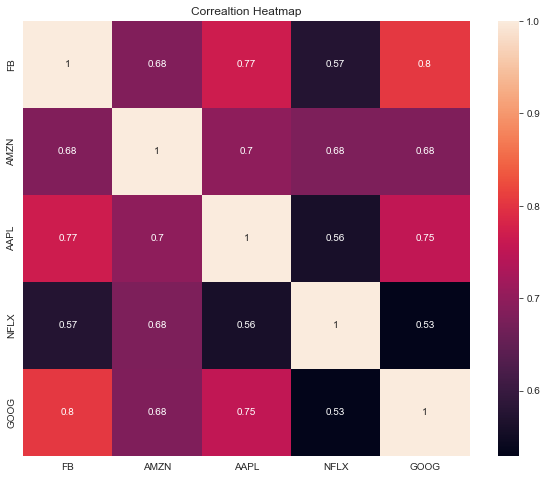

In [21]:
# Correlation tells us how closely 2 stocks returns move together
# Correlation is a standardized value lying between -1 and 1
# When this value is greater that .5 we say that these stocks are strongly correlated
# Of course each stocks price is perfectly correlated with itself

# We focus on the correlation of returns because investors care about returns 

# Merge all stock price data into 1 dataframe
faang_list = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *faang_list)
mult_df

# Generate a Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mult_df.corr(), annot=True)
plt.title("Correaltion Heatmap")
plt.show()

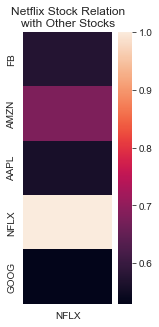

In [22]:
# We can look at the correlation between Netflix and the others
plt.figure(figsize=(2, 5))
sns.heatmap(pd.DataFrame(mult_df.corr()['NFLX']))
plt.title("Netflix Stock Relation\nwith Other Stocks")
plt.show()

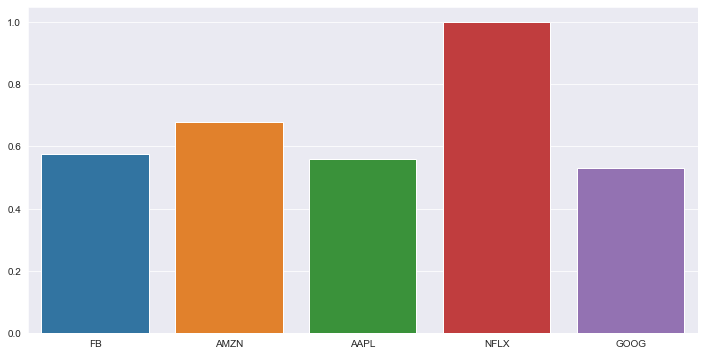

In [23]:
# We can plot this in a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=mult_df.corr()['NFLX'].index, y=mult_df.corr()['NFLX'].values)
plt.show()

# Get the Variance of a Stock

In [24]:
# Remember variance is a measure of how spread out a data set is
# Get Netflix variance
mult_df['NFLX'].var()

# Annualize by getting the number of samples and multiply
days = len(mult_df.index) # 253

nflx_a_var = mult_df['NFLX'].var() * days
nflx_a_var

0.2143523699684344

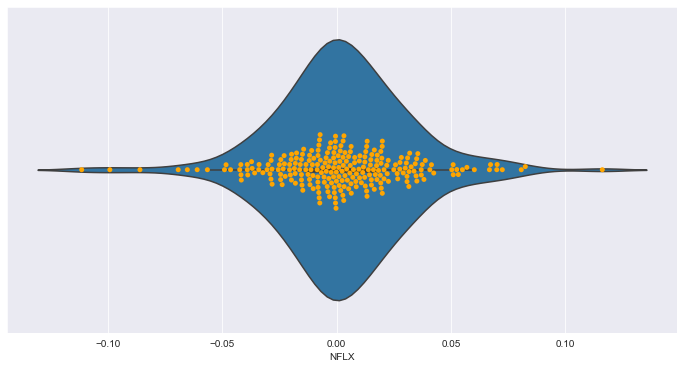

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(mult_df['NFLX'])
ax = sns.swarmplot(mult_df['NFLX'], color="orange")

# Get Covariance of Stocks
### Covariance is the measure of the relationship between 2 blocks of data. The covariance of a stock to itself is the variance of that variable.

In [26]:
mult_df.cov() * days

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.211498,0.121090,0.165004,0.122340,0.141870
AMZN,0.121090,0.148918,0.125888,0.121261,0.100904
AAPL,0.165004,0.125888,0.218483,0.120969,0.135044
NFLX,0.122340,0.121261,0.120969,0.214352,0.094118
GOOG,0.141870,0.100904,0.135044,0.094118,0.147431


# Why do We Care About Risk
Most investors don't handle massive flucuations in stock prices well. What we want to do at the very least is to make them aware of how dramatically their portfolios returns may be. We can then do our best to minimize risk by adding other stocks that have returns that aren't as closely correlated.

# Calculating a Portfolios Variance
When calculating the variance of a portfolio we must define its weight, or how much of the portfolio it makes up. If you add up the weight of all stocks you get a value of 1.

$ w_1, w_2 $ = Stock Weights

$ \sigma_1, \sigma_2 $ = Stock Standard Deviations

Portfolio Variance = $ (w_1\sigma_1 + w_2\sigma_2)^2 $

Since $ (a+b)^2 = a^2 + 2ab + b^2 $

Then the Portfolio Variance = $ w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_12 + w_2^2\sigma_2^2 $

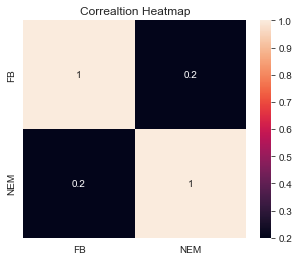

In [27]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["FB", "NEM"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
port_df

# Generate a Correlation Matrix to see that they are not correlated
plt.figure(figsize=(5, 4))
sns.heatmap(port_df.corr(), annot=True)
plt.title("Correaltion Heatmap")
plt.show()

In [28]:
# Get prices at the beginning of Jan 2020 to calculate weight of both stocks
price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *["FB","NEM"])
price_df.head()

,FB,NEM
754,209.779999,41.741852
755,208.669998,41.365192
756,212.600006,41.780479
757,213.059998,41.751507
758,215.220001,40.640842


In [29]:
# I'll buy 1 share of FB at 209.78 & 5 of NEM for 41.74 for a total of 208.70
# Total Value = $418.48
fb_wt = round(209.78 / 418.48, 4)
nem_wt = round(208.70 / 418.48, 4)
# make sure to change the values a little bit so they sum up to 1
wts = np.array([fb_wt, nem_wt])

In [30]:
# The portfolio variance is found from matrix multiplication
# We transpose the weights, multiply by the covarience and then the weight to get 
# the covariance of the portfolio
wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("FB Var :", port_df["FB"].var() * 253)
print("NEM Var :", port_df["NEM"].var() * 253)

Portfolio Var : 0.12743401424648793
FB Var : 0.21149771065707507
NEM Var : 0.2133476376573067
